<a href="https://colab.research.google.com/github/Hruthika100/DS_PY_Writeups_2001610/blob/main/Exp09_notebook_2001609.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment No. 09**

**1. Define your Problem statement and ML technique II(two) you propose to use.**

**Ans.** **Problem Statement :** 
Develop a machine learning model for predicting the heavy drinking episodes via mobile data.

**ML Technique 2 :**

**Random Forest Regression**

We will build a Random Forest Regression regression model for Bar Crawl dataset. The dataset consists of participant id, time and a sample from each axis of the accelerometer We will predict heavy drinking episodes of the participants

To build a more accurate predictive model, we can use the Random Forest algorithm, which is an ensemble learning technique that combines multiple decision trees with bootstrap aggregating. In Random Forest Regression, multiple decision trees will split the data into smaller subsets, and each split will generate a prediction. The final prediction will be the average of all predicted values, providing more accurate results than the above linear regression model.



**2. Write about working of ML technique II you have proposed**

**Ans.**Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 

Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

**1.Design a specific question or data and get the source to determine the required data.**

**2.Make sure the data is in an accessible format else convert it to the required format.**

**3.Specify all noticeable anomalies and missing data points that may be required to achieve the required data.**

**4.Create a machine learning model**

**5.Set the baseline model that you want to achieve**

**6.Train the data machine learning model.**

**7.Provide an insight into the model with test data**

**8.Now compare the performance metrics of both the test data and the predicted data from the model.**

**9.If it doesn’t satisfy your expectations, you can try improving your model accordingly or dating your data, or using another data modeling technique.**

**10.At this stage, you interpret the data you have gained and report accordingly.** 

**3. Pull your chosen data set from experiment 7**

**Ans.**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline


In [ ]:
import pandas as pd
accelerometer_info = pd.read_csv("https://media.githubusercontent.com/media/HeemaliGhorpade/DS_PY_Writeups_2001609/main/accelerator.csv")
print('\nNumber of rows and columns in the data set 1: ',accelerometer_info.shape)
phone_info = pd.read_csv("https://media.githubusercontent.com/media/HeemaliGhorpade/DS_PY_Writeups_2001609/main/phone.csv")
print('\nNumber of rows and columns in the data set 2: ',phone_info.shape)
#Lets look into top few rows and columns in the dataset
print(accelerometer_info.head())

print(phone_info.head())



Number of rows and columns in the data set 1:  (1048575, 5)

Number of rows and columns in the data set 2:  (13, 2)
           time     pid       x       y       z
0  0.000000e+00  JB3156  0.0000  0.0000  0.0000
1  0.000000e+00  CC6740  0.0000  0.0000  0.0000
2  1.493730e+12  SA0297  0.0758  0.0273 -0.0102
3  1.493730e+12  SA0297 -0.0359  0.0794  0.0037
4  1.493730e+12  SA0297 -0.2427 -0.0861 -0.0163
      pid phonetype
0  BK7610    iPhone
1  BU4707    iPhone
2  CC6740   Android
3  DC6359    iPhone
4  DK3500    iPhone


**4. Do pre-processing as per requirements of ML technique I**

**Ans.**

In [ ]:
print(accelerometer_info.describe())
print(phone_info.describe())

               time             x             y             z
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06
mean   1.493737e+12  7.631742e-03 -2.163123e-02  4.669918e-03
std    2.062957e+09  7.722696e-01  9.481331e-01  1.349705e+00
min    0.000000e+00 -2.295613e+01 -3.059311e+01 -4.236954e+01
25%    1.493740e+12 -5.500000e-03 -2.400000e-03 -6.200000e-03
50%    1.493740e+12  0.000000e+00  2.000000e-04  4.300000e-03
75%    1.493740e+12  4.600000e-03  8.300000e-03  1.280000e-02
max    1.493740e+12  2.801009e+01  1.862511e+01  3.481242e+01
           pid phonetype
count       13        13
unique      13         2
top     BK7610    iPhone
freq         1        11


In [ ]:
print('The dataset has {} rows.'.format(len(accelerometer_info)))
print('The dataset has {} columns'.format(accelerometer_info.columns))
print(accelerometer_info.info())

The dataset has 1048575 rows.
The dataset has Index(['time', 'pid', 'x', 'y', 'z'], dtype='object') columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   time    1048575 non-null  float64
 1   pid     1048575 non-null  object 
 2   x       1048575 non-null  float64
 3   y       1048575 non-null  float64
 4   z       1048575 non-null  float64
dtypes: float64(4), object(1)
memory usage: 40.0+ MB
None


In [ ]:
# Finding missing values using isnull() function in pandas library
print(accelerometer_info.isnull().sum())
print(phone_info.isnull().sum())

time    0
pid     0
x       0
y       0
z       0
dtype: int64
pid          0
phonetype    0
dtype: int64


<Axes: xlabel='x'>

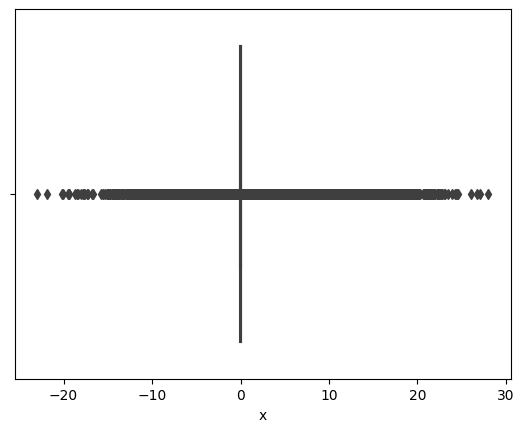

In [ ]:
#Finding outliers using boxplot
import seaborn as sns
import pandas as pd
sns.boxplot(x=accelerometer_info['x'])


In [ ]:
numeric_cols = accelerometer_info.select_dtypes(include=[float, int]).columns
q1 = accelerometer_info[numeric_cols].quantile(0.25)
q3 = accelerometer_info[numeric_cols].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [ ]:
accelerometer_info[numeric_cols] = accelerometer_info[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)


In [ ]:
accelerometer_info.to_csv('cleaned.csv', index=False)

<Axes: xlabel='x'>

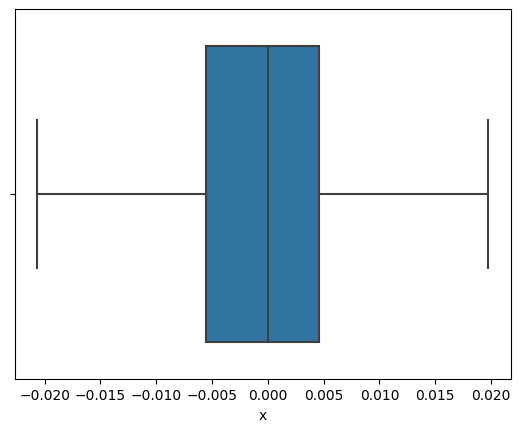

In [ ]:
#Finding outliers using boxplot
import seaborn as sns
import pandas as pd
sns.boxplot(x=accelerometer_info['x'])

<ipython-input-97-1b89b0c3c4e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(accelerometer_info.corr(), annot=True)


<Axes: >

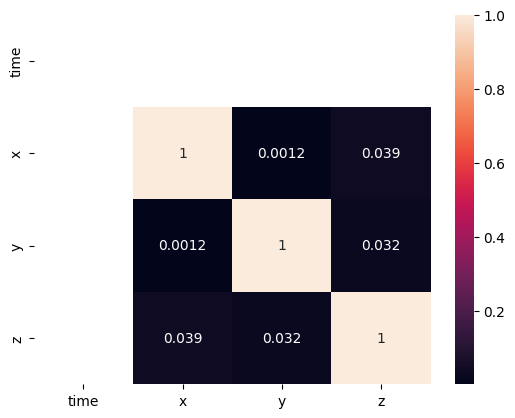

In [ ]:
sns.heatmap(accelerometer_info.corr(), annot=True)

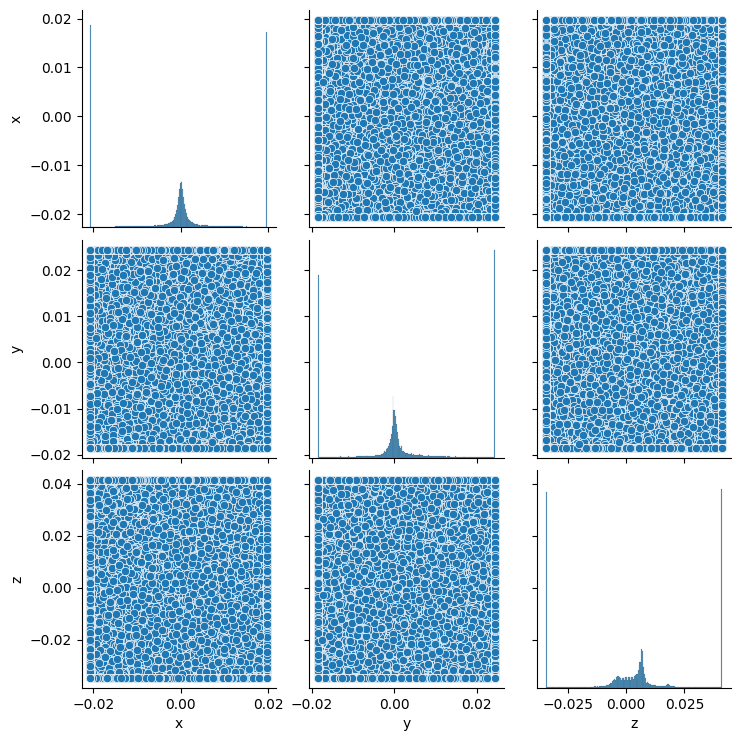

In [ ]:
sns.pairplot(accelerometer_info.drop(columns='time'))

**5. Divide Data set in to training and validation sets**

**Ans** Splitting the data into training and testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(accelerometer_info.drop(columns='pid'), accelerometer_info['time'], test_size=0.2)

In [ ]:
X_train.describe()

,time,x,y,z
count,8.388600e+05,838860.000000,838860.000000,838860.000000
mean,1.493740e+12,-0.000309,0.002133,0.003309
std,0.000000e+00,0.012939,0.013641,0.024187
min,1.493740e+12,-0.020650,-0.018450,-0.034700
25%,1.493740e+12,-0.005500,-0.002400,-0.006200
50%,1.493740e+12,0.000000,0.000200,0.004300
75%,1.493740e+12,0.004600,0.008300,0.012800
max,1.493740e+12,0.019750,0.024350,0.041300


The ranges of all the features are very distinct and should be scaled correctly before making any predictions

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


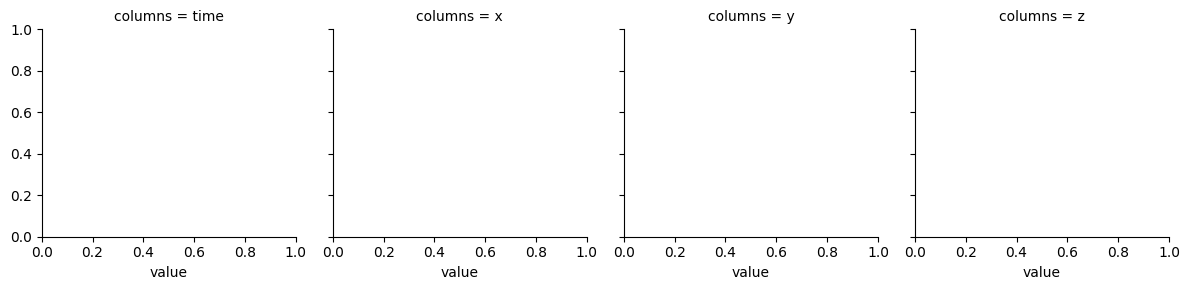

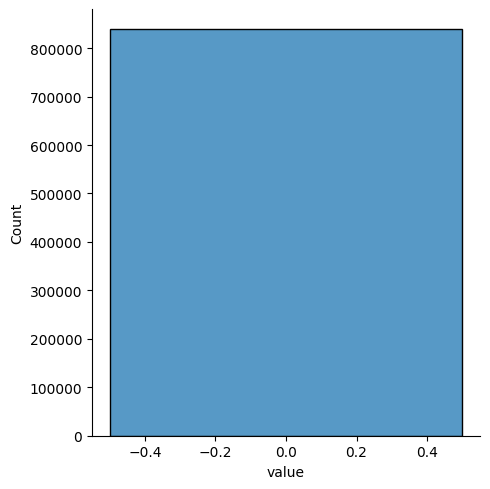

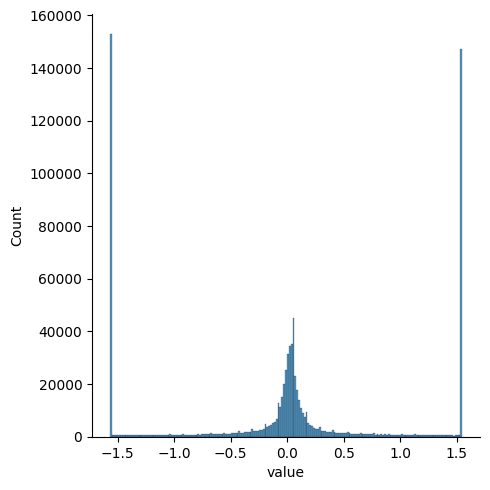

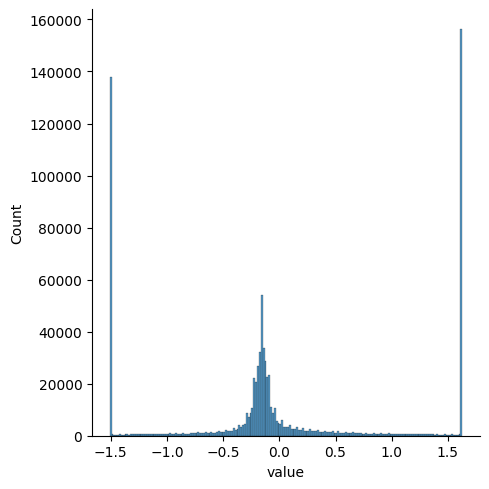

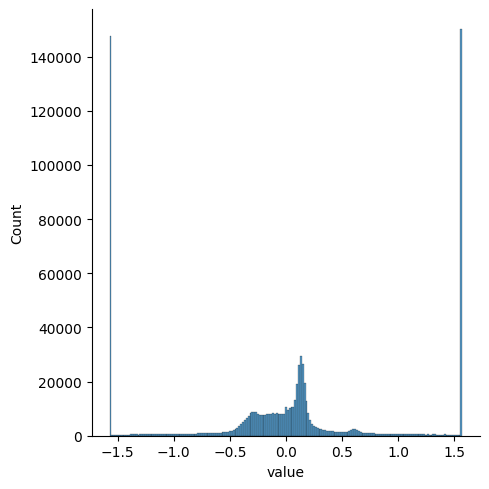

In [ ]:
dfm = X_train.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.displot, 'value'))

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test = pd.DataFrame(X_test_norm, columns=X_test.columns)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


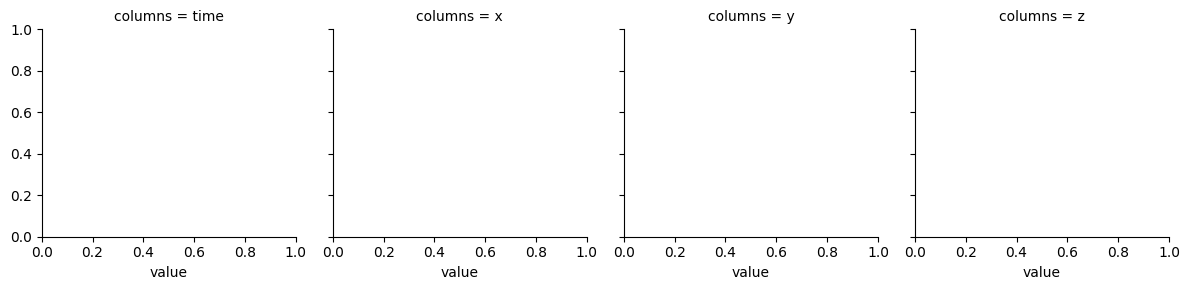

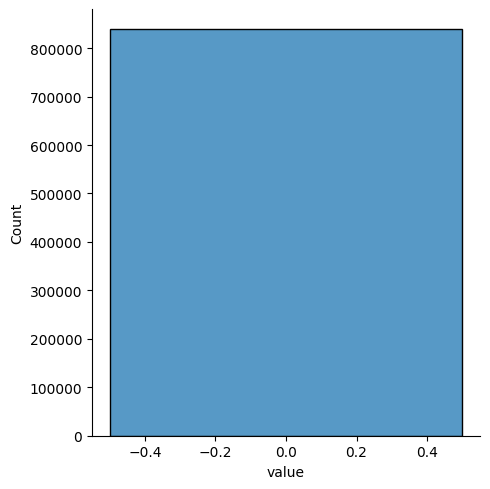

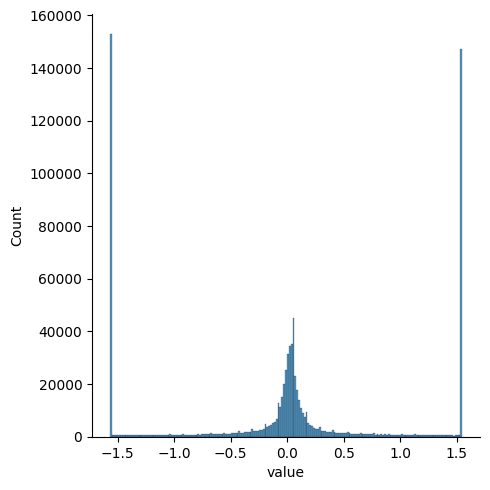

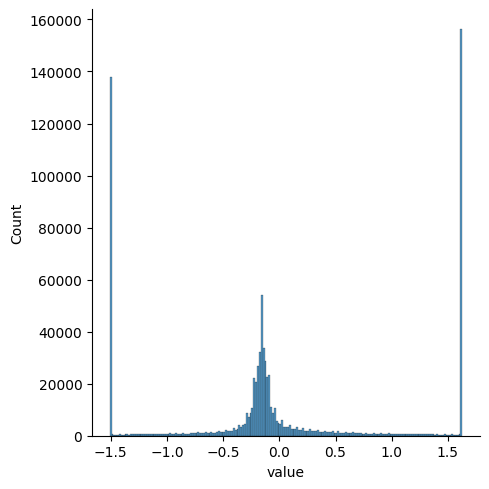

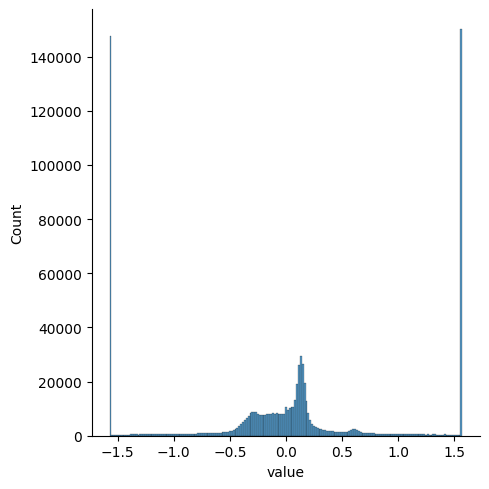

In [ ]:
dfm = X_train.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.displot, 'value'))

We can see that all the values have 0 mean and have a normal distribution. This enables the model to make better predictions.

**6. Perform training**

**Ans.**
Creating a Grid Search for Random Forest Regressor

In [ ]:
gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid={
                              'n_estimators': [50, 100, 250, 300],
                              'max_depth': [None, 100, 200, 300, 400]
                          },
                          cv=3,
                          return_train_score=False,
                          scoring='r2')
gridsearch.fit(X=X_train, y=y_train)
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,
1,2.551156,1.321139,0.206478,0.094271,None,50,"{'max_depth': None, 'n_estimators': 50}",1.0,1.0,1.0,1.0,0.0
1,2.679151,0.191337,0.253817,0.058100,None,100,"{'max_depth': None, 'n_estimators': 100}",1.0,1.0,1.0,1.0,0.0
1,6.350287,0.297538,0.486698,0.006550,None,250,"{'max_depth': None, 'n_estimators': 250}",1.0,1.0,1.0,1.0,0.0
1,7.751518,0.305005,0.579005,0.010547,None,300,"{'max_depth': None, 'n_estimators': 300}",1.0,1.0,1.0,1.0,0.0
1,1.461969,0.201551,0.151301,0.033127,100,50,"{'max_depth': 100, 'n_estimators': 50}",1.0,1.0,1.0,1.0,0.0
1,2.460666,0.025352,0.200808,0.007387,100,100,"{'max_depth': 100, 'n_estimators': 100}",1.0,1.0,1.0,1.0,0.0
1,6.483675,0.325163,0.502053,0.030722,100,250,"{'max_depth': 100, 'n_estimators': 250}",1.0,1.0,1.0,1.0,0.0
1,7.915006,0.557279,0.579103,0.008046,100,300,"{'max_depth': 100, 'n_estimators': 300}",1.0,1.0,1.0,1.0,0.0
1,1.228953,0.005154,0.100907,0.002033,200,50,"{'max_depth': 200, 'n_estimators': 50}",1.0,1.0,1.0,1.0,0.0


Creating a pipeline

In [ ]:
pipe = make_pipeline(scaler, gridsearch)

This pipeline can be used to deploy this model. It contains the complete model which scales the input data and runs it through the Random Forest to get a prediction.

Testing out the predictions of the pipeline and the model trained above.



**7. Perform Validation**

**Ans**

In [ ]:
print('Original model: ' + str(gridsearch.predict(X=scaler.transform(accelerometer_info.drop(columns='pid').iloc[0].values.reshape(1, -1)))[0]))
print('Pipeline model: ' + str(pipe.predict(X=accelerometer_info.drop(columns='pid').iloc[0].values.reshape(1, -1))[0]))

Original model: 1493740000000.0
Pipeline model: 1493740000000.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The predictions are the same. We can now export the pipeline.

In [ ]:
!pip install dill

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import dill
with open('rf_v1.pkl', 'wb') as f:
    dill.dump(pipe, f)

In [ ]:
with open('rf_v1.pkl', 'rb') as f:
    model = dill.load(f)
    print(model.predict(X=accelerometer_info.drop(columns='pid').iloc[0].values.reshape(1, -1))[0])

1493740000000.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**8. Report Accuracy of your trained ML Model**

**Ans.** **Predictions are the same of the trained model.** 

**We can see that the model is exported correctly and when imported, gives the same prediction for the same data.**